In [41]:
import pandas as pd
from plotnine import *

%matplotlib inline

In [2]:
data = pd.read_csv('../datasets/gamedetails.csv')
playerInfo = pd.read_csv('../datasets/playersinfo.csv')

In [3]:
print(data.shape)
print(playerInfo.shape)
# data.head()
col = data.columns[1:]
data = data[col].copy()

playerInfoCol = playerInfo.columns[1:]
playerInfo = playerInfo[playerInfoCol].copy()

(44514, 22)
(132, 9)


In [4]:
data.describe()

,gameId,teamId,points,playerId,fgm,fga,ftm,fta,tpm,tpa,offReb,defReb,assists,steals,blocks,pFouls,turnovers,plusMinus,minutes,seconds
count,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.00000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000,44514.000000
mean,5121.639641,19.316732,8.681875,478.467089,3.204857,6.970167,1.386350,1.807589,0.885811,2.509615,0.80505,2.728872,1.920407,0.592712,0.384239,1.634609,1.054500,-0.000045,18.450982,24.620704
std,467.011351,11.540629,8.530190,331.967428,3.176252,6.117571,2.155063,2.635619,1.327951,2.864058,1.30888,2.821097,2.453618,0.912744,0.780321,1.532402,1.350789,10.318568,12.494288,19.267475
min,4308.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-47.000000,0.000000,0.000000
25%,4725.000000,9.000000,1.000000,206.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,7.000000,5.000000
50%,5172.000000,20.000000,7.000000,398.000000,3.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.00000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,23.000000
75%,5522.000000,27.000000,14.000000,776.000000,5.000000,11.000000,2.000000,3.000000,1.000000,4.000000,1.00000,4.000000,3.000000,1.000000,1.000000,3.000000,2.000000,5.000000,29.000000,42.000000
max,6221.000000,93.000000,61.000000,1844.000000,21.000000,40.000000,22.000000,27.000000,14.000000,24.000000,12.00000,23.000000,24.000000,8.000000,9.000000,6.000000,11.000000,50.000000,64.000000,59.000000


In [4]:
## make sure gameId, teamId, and playerId as index/primary keys550,000,000
data = data.groupby(['gameId', 'teamId', 'playerId']).max().reset_index()

In [135]:
data

,gameId,teamId,playerId,points,min,fgm,fga,ftm,fta,tpm,...,offReb,defReb,assists,steals,blocks,pFouls,turnovers,plusMinus,minutes,seconds
0,4308,18,688,4,24:44,1,8,2,3,0,...,1,2,1,4,0,2,1,-16,24,44
1,4308,18,706,19,39:29,6,22,4,4,3,...,0,3,5,4,0,4,5,-12,39,29
2,4308,18,709,2,12:20,0,3,2,2,0,...,1,1,0,0,0,4,1,-9,12,20
3,4308,18,1091,0,0:21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21
4,4308,18,1092,2,11:54,1,2,0,0,0,...,0,0,2,0,0,0,1,-11,11,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35533,6221,38,434,0,10:50,0,2,0,0,0,...,0,1,0,0,0,2,1,5,10,50
35534,6221,38,479,26,46:10,10,17,3,4,3,...,2,8,3,1,1,2,2,2,46,10
35535,6221,38,527,22,33:48,6,14,5,5,5,...,1,1,0,1,0,1,1,-10,33,48
35536,6221,38,732,0,0:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
data["playerId"].value_counts()

479     110
184     109
203     108
581     108
514     107
       ... 
1123      1
1155      1
1151      1
1795      1
1807      1
Name: playerId, Length: 768, dtype: int64

In [14]:
# look at team 
# data["teamId"].value_counts()
# data.groupby(['gameId', 'teamId']).agg('count')
data.groupby(['teamId']).agg('count')['gameId'].sort_values()

teamId
39      10
42      10
92      11
90      12
12      12
33      12
87      13
35      13
34      14
32      15
91      20
18      27
93      31
13      32
6     1222
7     1324
28    1336
4     1338
8     1343
1     1347
17    1349
24    1357
41    1367
19    1400
5     1411
40    1412
23    1413
25    1425
20    1440
15    1451
22    1452
27    1463
21    1477
30    1494
10    1516
14    1527
31    1543
26    1550
2     1628
16    1631
9     1645
29    1748
38    1824
11    1849
Name: gameId, dtype: int64

In [9]:
nonNba = [39, 42, 92, 90, 12, 33, 87, 35, 34, 32, 91, 18, 93, 13]

In [5]:
# byGame_n_team = data.groupby(['gameId', 'teamId']).agg('sum').reset_index()
byGame_n_team = data.groupby(['gameId', 'teamId']).sum().reset_index()

In [6]:
# check all gameId has 2 teams
game_by_team = byGame_n_team['gameId'].value_counts().tolist()

In [7]:
for g in game_by_team:
    if g != 2:
        print(g)

# yaay ! none means no anomaly

In [142]:
# but somehow we got repeated playerId. so have to get rid of the dups
# issue is from the data, not the script. script has to make sure no dups. 
byGame_n_team.groupby(['gameId', 'teamId', 'playerId']).sum()

points  fgm  fga  ftm  fta  tpm  tpa  offReb  defReb  \
gameId teamId playerId                                                         
4308   18     13058         84   31   82   13   14    9   33       8      29   
       27     9575         104   41   85   16   25    6   29      11      37   
4309   2      13534         97   36  104   16   22    9   47      11      45   
       5      11722        104   34   89   25   39   11   36      12      53   
4310   29     8825         104   37   88   18   25   12   31      11      35   
...                        ...  ...  ...  ...  ...  ...  ...     ...     ...   
6219   38     4850         105   36   86   23   24   10   32       6      32   
6220   11     4496         106   38   82   10   14   20   42       6      31   
       38     5223         105   38   85   21   27    8   32      13      30   
6221   11     5310         110   39   80   21   30   11   31      11      31   
       38     5315         114   39   82   23   29   13   33      11      28   

                        assists  steals  blocks  pFouls  turnovers  plusMinus  \
gameId teamId playerId                                                          
4308   18     13058          15      10       1      26         20       -100   
       27     9575           25      13       9      19         17        100   
4309   2      13534          12       9       7      35         12        -35   
       5      11722          17       4       7      22         17         35   
4310   29     8825           25       4       2      45         24        -90   
...                         ...     ...     ...     ...        ...        ...   
6219   38     4850           22      12       4      21          9         65   
6220   11     4496           27       5       7      22         15          5   
       38     5223           19       6       5      19         13         -5   
6221   11     5310           28       9       6      23         16        -20   
       38     5315           25       8       2      23         12         20   

                        minutes  seconds  
gameId teamId playerId                    
4308   18     13058         233      419  
       27     9575          235      300  
4309   2      13534         235      300  
       5      11722         235      299  
4310   29     8825          234      360  
...                         ...      ...  
6219   38     4850          234      360  
6220   11     4496          235      298  
       38     5223          236      239  
6221   11     5310          234      357  
       38     5315          236      239  

[2762 rows x 17 columns]

In [143]:
# byGame_n_team[byGame_n_team["gameId"] == 5567]
data[(data["gameId"] == 6196) & (data["teamId"] == 29) & (data["playerId"] == 12)]
# data[(data["gameId"] == 4308) & (data["teamId"] == 18) & (data["playerId"] == 688)]

,gameId,teamId,playerId,points,min,fgm,fga,ftm,fta,tpm,...,offReb,defReb,assists,steals,blocks,pFouls,turnovers,plusMinus,minutes,seconds
35162,6196,29,12,9,19:36,3,8,2,2,1,...,1,5,1,0,0,2,1,-2,19,36


In [8]:
# sort df by gameId, teamId
byGame_n_team.sort_values(["gameId", "teamId"], inplace=True)
# get opp team id, we have to get pts diff
byGame_n_team["oppTeamId"] = byGame_n_team.diff()["gameId"]

In [145]:
byGame_n_team[byGame_n_team["oppTeamId"] > 1]

,gameId,teamId,playerId,points,fgm,fga,ftm,fta,tpm,tpa,...,defReb,assists,steals,blocks,pFouls,turnovers,plusMinus,minutes,seconds,oppTeamId
664,4651,4,3037,102,33,79,22,26,14,45,...,37,26,2,4,22,18,-50,234,360,12.0
1492,5066,10,5222,101,36,82,19,25,10,29,...,33,21,6,2,23,14,-10,235,300,2.0
2594,5712,34,4545,164,66,140,5,7,27,77,...,45,43,8,1,6,12,-70,234,360,96.0
2598,5715,4,5069,111,38,88,24,26,11,26,...,35,15,9,2,27,11,45,235,300,2.0
2670,5753,11,5346,121,43,96,20,22,15,39,...,24,31,7,3,23,8,-40,236,240,3.0
2674,5757,9,5475,103,44,96,9,12,6,24,...,25,26,5,3,18,7,-85,233,420,3.0
2676,5761,11,5346,129,47,89,25,31,10,30,...,39,32,6,9,24,10,95,235,300,4.0
2678,6126,9,5475,90,35,88,18,23,2,20,...,40,21,3,8,19,6,20,235,300,365.0
2680,6152,27,5869,95,35,89,14,21,11,32,...,34,23,5,2,21,14,-65,234,360,26.0
2702,6164,27,4771,90,28,65,25,30,9,27,...,36,16,4,7,21,15,-10,236,236,2.0


In [9]:
byGame_n_team.isnull().sum()
# byGame_n_team.isnull().values
byGame_n_team[byGame_n_team["points"] > 200]

,gameId,teamId,playerId,points,fgm,fga,ftm,fta,tpm,tpa,...,defReb,assists,steals,blocks,pFouls,turnovers,plusMinus,minutes,seconds,oppTeamId


In [10]:
byGame_n_team.fillna(1, inplace=True)

In [11]:
# convert oppTeamId to int 
print(byGame_n_team["oppTeamId"].dtypes)
byGame_n_team["oppTeamId"] = byGame_n_team["oppTeamId"].astype('int32')
print(byGame_n_team["oppTeamId"].dtypes)

float64
int32


In [86]:
byGame_n_team.loc[664:665]

,gameId,teamId,points,playerId,fgm,fga,ftm,fta,tpm,tpa,...,defReb,assists,steals,blocks,pFouls,turnovers,plusMinus,minutes,seconds,oppTeamId
664,4651,4,102,3037,33,79,22,26,14,45,...,37,26,2,4,22,18,-50,234,360,12.0
665,4651,22,112,5900,44,92,15,17,9,25,...,29,25,15,4,20,7,50,236,240,0.0


In [87]:
byGame_n_team[byGame_n_team["gameId"] == 6216]

,gameId,teamId,points,playerId,fgm,fga,ftm,fta,tpm,tpa,...,defReb,assists,steals,blocks,pFouls,turnovers,plusMinus,minutes,seconds,oppTeamId
2750,6216,11,109,5310,34,78,29,31,12,31,...,29,29,6,2,27,16,-45,236,237,9.0
2751,6216,38,118,4955,39,77,27,32,13,33,...,29,25,6,6,26,10,45,236,239,0.0


In [14]:
byGame_n_team['oppTeamId'].value_counts()

0      1381
1      1366
3         3
2         3
4         2
365       1
11        1
9         1
96        1
26        1
12        1
6         1
Name: oppTeamId, dtype: int64

In [90]:
byGame_n_team[['gameId', 'teamId', 'points','oppTeamId']]

,gameId,teamId,points,oppTeamId
0,4308,18,84,1.0
1,4308,27,104,0.0
2,4309,2,97,1.0
3,4309,5,104,0.0
4,4310,29,104,1.0
...,...,...,...,...
2757,6219,38,105,0.0
2758,6220,11,106,1.0
2759,6220,38,105,0.0
2760,6221,11,110,1.0


## 1 gameId per row
1. separate home team from away team into 2 different dfs
2. merge these 2 dfs into 1 df

In [12]:
# separate home team from away team
home = byGame_n_team[byGame_n_team['oppTeamId'] >= 1].copy()
away = byGame_n_team[byGame_n_team['oppTeamId'] < 1].copy()

In [13]:
print(home.head())
print("==========================================================")
print(away.head())

   gameId  teamId  playerId  points  fgm  fga  ftm  fta  tpm  tpa  ...  \
0    4308      18     13058      84   31   82   13   14    9   33  ...   
2    4309       2     13534      97   36  104   16   22    9   47  ...   
4    4310      29      8825     104   37   88   18   25   12   31  ...   
6    4311       8     12360     116   39   75   23   36   15   27  ...   
8    4312      11      8305     110   44   93   10   13   12   34  ...   

   defReb  assists  steals  blocks  pFouls  turnovers  plusMinus  minutes  \
0      29       15      10       1      26         20       -100      233   
2      45       12       9       7      35         12        -35      235   
4      35       25       4       2      45         24        -90      234   
6      39       31       6      10      29         13        265      232   
8      41       33       9       8      23         17        -20      231   

   seconds  oppTeamId  
0      419          1  
2      300          1  
4      360          

In [14]:
result = pd.merge(home, away, how="outer", left_on=["gameId"], right_on=["gameId"])

In [152]:
result[result["gameId"] == 6219]

,gameId,teamId_x,playerId_x,points_x,fgm_x,fga_x,ftm_x,fta_x,tpm_x,tpa_x,...,defReb_y,assists_y,steals_y,blocks_y,pFouls_y,turnovers_y,plusMinus_y,minutes_y,seconds_y,oppTeamId_y
1378,6219,11,5310,92,35,78,14,21,8,27,...,32,22,12,4,21,9,65,234,360,0


In [15]:
# check to make sure we dont get double gameId
print(result["gameId"].value_counts().shape)
print(byGame_n_team["gameId"].value_counts().shape)

(1381,)
(1381,)


In [154]:
result

,gameId,teamId_x,playerId_x,points_x,fgm_x,fga_x,ftm_x,fta_x,tpm_x,tpa_x,...,defReb_y,assists_y,steals_y,blocks_y,pFouls_y,turnovers_y,plusMinus_y,minutes_y,seconds_y,oppTeamId_y
0,4308,18,13058,84,31,82,13,14,9,33,...,37,25,13,9,19,17,100,235,300,0
1,4309,2,13534,97,36,104,16,22,9,47,...,53,17,4,7,22,17,35,235,299,0
2,4310,29,8825,104,37,88,18,25,12,31,...,33,15,8,6,28,15,90,231,540,0
3,4311,8,12360,116,39,75,23,36,15,27,...,22,12,4,2,32,17,-265,231,539,0
4,4312,11,8305,110,44,93,10,13,12,34,...,36,15,11,6,16,15,20,234,360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,6217,11,5310,109,38,82,20,23,13,34,...,34,17,8,2,22,15,-25,236,238,0
1377,6218,11,5269,109,36,91,25,30,12,36,...,35,30,9,10,22,14,70,234,357,0
1378,6219,11,5310,92,35,78,14,21,8,27,...,32,22,12,4,21,9,65,234,360,0
1379,6220,11,4496,106,38,82,10,14,20,42,...,30,19,6,5,19,13,-5,236,239,0


In [16]:
# get diff _x vs _y
cols = list()
for c in result.columns:
    if ("_x") in c:
        cols.append(c[:c.index("_x")])

In [17]:
dat = list()
for i, row in result.iterrows():
#     row["win"] = 1
    for c in cols:
#         row[c + "_delta"] = abs(row[c + "_x"] - row[c + "_y"])
        row[c + "_delta"] = row[c + "_x"] - row[c + "_y"]
#         if c == "points":
#             if row[c + "_x"] < row[c + "_y"]:
#                 row["win"] = 0
    dat.append(row)

In [18]:
data_xy = pd.DataFrame(dat)

In [19]:
data_xy

,gameId,teamId_x,playerId_x,points_x,fgm_x,fga_x,ftm_x,fta_x,tpm_x,tpa_x,...,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta,oppTeamId_delta
0,4308,18,13058,84,31,82,13,14,9,33,...,-8,-10,-3,-8,7,3,-200,-2,119,1
1,4309,2,13534,97,36,104,16,22,9,47,...,-8,-5,5,0,13,-5,-70,0,1,1
2,4310,29,8825,104,37,88,18,25,12,31,...,2,10,-4,-4,17,9,-180,3,-180,1
3,4311,8,12360,116,39,75,23,36,15,27,...,17,19,2,8,-3,-4,530,1,-59,1
4,4312,11,8305,110,44,93,10,13,12,34,...,5,18,-2,2,7,2,-40,-3,179,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,6217,11,5310,109,38,82,20,23,13,34,...,2,17,-1,3,4,0,50,0,-2,1
1377,6218,11,5269,109,36,91,25,30,12,36,...,-7,-5,-1,-7,-1,0,-140,0,2,1
1378,6219,11,5310,92,35,78,14,21,8,27,...,2,4,-6,2,2,8,-130,0,-1,1
1379,6220,11,4496,106,38,82,10,14,20,42,...,1,8,-1,2,3,2,10,-1,59,1


In [20]:
cols = [
    'gameId',
    'teamId_x',
    'teamId_y',
    'points_delta',
    'playerId_delta', 
    'fgm_delta',
    'fga_delta', 
    'ftm_delta', 
    'fta_delta', 
    'tpm_delta', 
    'tpa_delta',
    'offReb_delta', 
    'defReb_delta', 
    'assists_delta', 
    'steals_delta',
    'blocks_delta', 
    'pFouls_delta', 
    'turnovers_delta', 
    'plusMinus_delta',
    'minutes_delta', 
    'seconds_delta',
]

games = data_xy[cols].copy()

In [21]:
games

,gameId,teamId_x,teamId_y,points_delta,playerId_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,...,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta
0,4308,18,27,-20,3483,-10,-3,-3,-11,3,...,-3,-8,-10,-3,-8,7,3,-200,-2,119
1,4309,2,5,-7,1812,2,15,-9,-17,-2,...,-1,-8,-5,5,0,13,-5,-70,0,1
2,4310,29,38,-18,132,3,6,-24,-26,0,...,-1,2,10,-4,-4,17,9,-180,3,-180
3,4311,8,91,53,-9423,22,4,0,5,9,...,1,17,19,2,8,-3,-4,530,1,-59
4,4312,11,22,-4,-1692,4,-1,-12,-17,0,...,-4,5,18,-2,2,7,2,-40,-3,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,6217,11,38,5,87,3,-12,-3,-3,2,...,-9,2,17,-1,3,4,0,50,0,-2
1377,6218,11,38,-14,-46,-7,9,5,9,-5,...,8,-7,-5,-1,-7,-1,0,-140,0,2
1378,6219,11,38,-13,460,-1,-8,-9,-3,-2,...,2,2,4,-6,2,2,8,-130,0,-1
1379,6220,11,38,1,-727,0,-3,-11,-13,12,...,-7,1,8,-1,2,3,2,10,-1,59


In [22]:
# still have to separate team x and team y.
# team x as it is
# team y = all delta reverse. plus to minus, minus to plus (*-1)
games.columns

Index(['gameId', 'teamId_x', 'teamId_y', 'points_delta', 'playerId_delta',
       'fgm_delta', 'fga_delta', 'ftm_delta', 'fta_delta', 'tpm_delta',
       'tpa_delta', 'offReb_delta', 'defReb_delta', 'assists_delta',
       'steals_delta', 'blocks_delta', 'pFouls_delta', 'turnovers_delta',
       'plusMinus_delta', 'minutes_delta', 'seconds_delta'],
      dtype='object')

In [23]:
team_x_cols = [ 
    'gameId', 
    'teamId_x',
    'points_delta', 
    'playerId_delta',
    'fgm_delta', 
    'fga_delta', 
    'ftm_delta', 
    'fta_delta', 
    'tpm_delta',
    'tpa_delta', 
    'offReb_delta', 
    'defReb_delta', 
    'assists_delta',
    'steals_delta', 
    'blocks_delta', 
    'pFouls_delta', 
    'turnovers_delta',
    'plusMinus_delta', 
    'minutes_delta', 
    'seconds_delta'
    ]

team_y_cols = [ 
    'gameId', 
    'teamId_y',
    'points_delta', 
    'playerId_delta',
    'fgm_delta', 
    'fga_delta', 
    'ftm_delta', 
    'fta_delta', 
    'tpm_delta',
    'tpa_delta', 
    'offReb_delta', 
    'defReb_delta', 
    'assists_delta',
    'steals_delta', 
    'blocks_delta', 
    'pFouls_delta', 
    'turnovers_delta',
    'plusMinus_delta', 
    'minutes_delta', 
    'seconds_delta'
    ]

team_x = games[team_x_cols]
team_y = games[team_y_cols]

In [24]:
# invert all value for team y
team_y_cols
invert_cols = ['gameId', 'teamId_y']
team_y_invert_cols = list(set(team_y_cols).difference(invert_cols))

In [25]:
team_y[team_y_invert_cols] = team_y[team_y_invert_cols].apply(lambda x: x*-1)

/home/user/anaconda3/envs/keras/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
team_y[team_y['gameId'] == 4308]

,gameId,teamId_y,points_delta,playerId_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,tpa_delta,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta
0,4308,27,20,-3483,10,3,3,11,-3,-4,3,8,10,3,8,-7,-3,200,2,-119


In [166]:
team_x[team_x['gameId'] == 4308]

,gameId,teamId_x,points_delta,playerId_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,tpa_delta,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta
0,4308,18,-20,3483,-10,-3,-3,-11,3,4,-3,-8,-10,-3,-8,7,3,-200,-2,119


In [27]:
# update col names
team_x = team_x.rename(columns={'teamId_x': 'teamId'})
team_y = team_y.rename(columns={'teamId_y': 'teamId'})

In [28]:
all_data_frames = [team_x, team_y]
all_data = pd.concat(all_data_frames)
all_data.drop(['playerId_delta'], axis=1, inplace=True)
# all_data.drop(['playerId_delta','gameId'], axis=1, inplace=True)

In [29]:
all_data["win"] = all_data["points_delta"].apply(lambda x: 1 if x > 0 else 0)

In [30]:
print(all_data.shape)
all_data.columns

(2762, 20)


Index(['gameId', 'teamId', 'points_delta', 'fgm_delta', 'fga_delta',
       'ftm_delta', 'fta_delta', 'tpm_delta', 'tpa_delta', 'offReb_delta',
       'defReb_delta', 'assists_delta', 'steals_delta', 'blocks_delta',
       'pFouls_delta', 'turnovers_delta', 'plusMinus_delta', 'minutes_delta',
       'seconds_delta', 'win'],
      dtype='object')

In [31]:
all_data.head()

,gameId,teamId,points_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,tpa_delta,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta,win
0,4308,18,-20,-10,-3,-3,-11,3,4,-3,-8,-10,-3,-8,7,3,-200,-2,119,0
1,4309,2,-7,2,15,-9,-17,-2,11,-1,-8,-5,5,0,13,-5,-70,0,1,0
2,4310,29,-18,3,6,-24,-26,0,-4,-1,2,10,-4,-4,17,9,-180,3,-180,0
3,4311,8,53,22,4,0,5,9,4,1,17,19,2,8,-3,-4,530,1,-59,1
4,4312,11,-4,4,-1,-12,-17,0,4,-4,5,18,-2,2,7,2,-40,-3,179,0


In [32]:
all_data[all_data['gameId'] == 4308]

,gameId,teamId,points_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,tpa_delta,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta,win
0,4308,18,-20,-10,-3,-3,-11,3,4,-3,-8,-10,-3,-8,7,3,-200,-2,119,0
0,4308,27,20,10,3,3,11,-3,-4,3,8,10,3,8,-7,-3,200,2,-119,1


In [33]:
all_data[all_data['teamId'] == 6]

,gameId,teamId,points_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,tpa_delta,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta,win
8,4316,6,12,5,2,11,8,-9,-21,-1,8,-1,3,-3,-4,-7,120,4,-239,1
21,4329,6,-34,-11,13,-4,-12,-8,-4,1,-22,-5,4,-5,7,-5,-340,0,0,0
62,4370,6,15,0,-2,10,12,5,7,-2,-1,1,1,0,-6,-4,150,-3,181,1
74,4382,6,-5,3,7,-10,-16,-1,0,-1,1,-3,-6,2,8,1,-50,-1,62,0
92,4400,6,-19,0,8,-18,-18,-1,-3,-6,-10,-2,-6,-2,6,-1,-190,-1,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,5162,6,-7,-1,-1,0,-4,-5,-8,-1,4,-5,-2,0,-1,4,-70,-1,60,0
886,5206,6,19,7,-9,4,8,1,-13,2,15,1,-4,4,0,5,190,0,0,1
955,5275,6,10,2,-4,4,0,2,1,5,12,0,-2,-5,4,6,100,-1,60,1
994,5314,6,7,-5,-4,18,23,-1,-12,2,1,-3,-1,-3,-4,-4,70,1,-60,1


In [34]:
all_data.describe()

,gameId,teamId,points_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,tpa_delta,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta,win
count,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.000000,2762.00000,2762.000000,2762.000000
mean,5025.013034,19.301231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.500000
std,440.463543,11.623101,15.005203,6.800462,8.814397,7.617247,9.167127,5.252067,10.215604,5.401115,7.528625,7.154527,3.956299,3.645263,4.904078,5.073955,149.749843,1.92808,89.115489,0.500091
min,4308.000000,1.000000,-58.000000,-29.000000,-40.000000,-26.000000,-30.000000,-23.000000,-51.000000,-22.000000,-25.000000,-26.000000,-14.000000,-14.000000,-19.000000,-19.000000,-580.000000,-39.00000,-301.000000,0.000000
25%,4664.000000,9.000000,-9.000000,-4.000000,-6.000000,-5.000000,-6.000000,-3.000000,-7.000000,-4.000000,-5.000000,-5.000000,-3.000000,-2.000000,-3.000000,-3.000000,-90.000000,-1.00000,-60.000000,0.000000
50%,5009.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.500000
75%,5355.000000,27.000000,9.000000,4.000000,6.000000,5.000000,6.000000,3.000000,7.000000,4.000000,5.000000,5.000000,3.000000,2.000000,3.000000,3.000000,90.000000,1.00000,60.000000,1.000000
max,6221.000000,93.000000,58.000000,29.000000,40.000000,26.000000,30.000000,23.000000,51.000000,22.000000,25.000000,26.000000,14.000000,14.000000,19.000000,19.000000,580.000000,39.00000,301.000000,1.000000


In [175]:
all_data[all_data["points_delta"] > 100]

,gameId,teamId,points_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,tpa_delta,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta,plusMinus_delta,minutes_delta,seconds_delta,win


In [185]:
t = all_data.groupby(['teamId', 'win']).agg(
#     win_cnt = pd.NamedAgg(column='win', aggfunc=sum),
    game_cnt = pd.NamedAgg(column='win', aggfunc='count')
).reset_index()

In [190]:
# all team with only 1 game are non-nba
t[t["game_cnt"] == 1]

,teamId,win,game_cnt
20,12,0,1
57,32,0,1
58,33,0,1
59,34,0,1
60,35,1,1
63,39,1,1
68,42,0,1
69,87,0,1
70,90,0,1
71,91,0,1


In [35]:
# remove all non nba
nonNba = [39, 42, 92, 90, 12, 33, 87, 35, 34, 32, 91, 18, 93, 13]
all_data = all_data[~all_data["teamId"].isin(nonNba)].copy()

In [36]:
all_data.groupby(['teamId', 'win']).agg(
#     win_cnt = pd.NamedAgg(column='win', aggfunc=sum),
    game_cnt = pd.NamedAgg(column='win', aggfunc='count')
)

game_cnt
teamId win          
1      0          56
       1          30
2      0          39
       1          55
4      0          45
       1          45
5      0          43
       1          43
6      0          63
       1          23
7      0          64
       1          21
8      0          51
       1          34
9      0          36
       1          64
10     0          47
       1          43
11     0          36
       1          72
14     0          35
       1          62
15     0          40
       1          50
16     0          38
       1          55
17     0          48
       1          39
19     0          52
       1          34
20     0          46
       1          42
21     0          28
       1          72
22     0          49
       1          37
23     0          54
       1          33
24     0          67
       1          19
25     0          38
       1          52
26     0          47
       1          45
27     0          37
       1          61
28     0          64
       1          21
29     0          38
       1          64
30     0          47
       1          40
31     0          39
       1          54
38     0          33
       1          77
40     0          35
       1          56
41     0          51
       1          36

In [53]:
# print(all_data.columns)
to_remove_cols = [
    'gameId',
    'plusMinus_delta',
    'minutes_delta',
    'seconds_delta'
]
all_cols = list(all_data.columns)
col = [e for e in all_cols if e not in to_remove_cols]
# print(col)
work_data = all_data[col].copy()

In [67]:
# make sure we're working with all positive number
# work_data.groupby(['teamId', 'win']).agg(['mean'])

# for cols in work_data.columns.tolist():
#     if any(work_data[cols] < 0):
# #         print(work_data[cols])
#         print(cols)

work_data= abs(work_data)

In [68]:
# check for negative
for cols in work_data.columns.tolist():
    if any(work_data[cols] < 0):
#         print(work_data[cols])
        print(cols)


In [78]:
grouped_per_win = work_data.groupby(['teamId', 'win']).agg(['mean']).reset_index()

In [84]:
grouped_per_win

,teamId,win,points_delta,fgm_delta,fga_delta,ftm_delta,fta_delta,tpm_delta,tpa_delta,offReb_delta,defReb_delta,assists_delta,steals_delta,blocks_delta,pFouls_delta,turnovers_delta
,,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,1,0,14.071429,5.178571,7.500000,7.803571,9.803571,3.410714,6.785714,3.982143,5.785714,4.964286,3.517857,2.767857,4.839286,4.446429
1,1,1,8.266667,4.233333,5.700000,6.200000,7.133333,4.133333,7.666667,4.766667,5.666667,4.833333,3.666667,3.033333,3.666667,3.733333
2,2,0,9.820513,4.153846,5.615385,6.897436,7.974359,3.641026,7.051282,3.333333,6.025641,4.461538,3.128205,2.794872,3.948718,3.410256
3,2,1,13.090909,6.054545,6.400000,5.763636,7.400000,3.836364,5.872727,3.636364,5.000000,6.200000,3.109091,2.618182,3.090909,3.963636
4,4,0,11.377778,6.866667,8.133333,5.622222,6.422222,3.266667,8.955556,4.222222,6.400000,5.311111,3.622222,2.777778,3.111111,4.777778
5,4,1,9.622222,4.733333,7.622222,7.088889,8.977778,4.444444,8.866667,4.222222,6.133333,4.777778,2.444444,2.955556,4.333333,4.111111
6,5,0,12.697674,6.255814,6.581395,5.348837,7.186047,3.906977,6.790698,3.767442,7.279070,7.372093,2.976744,2.883721,4.534884,4.232558
7,5,1,11.348837,4.046512,8.046512,6.139535,8.162791,3.627907,7.581395,4.860465,4.372093,4.906977,2.790698,2.511628,3.953488,3.255814
8,6,0,14.460317,5.428571,7.904762,5.000000,6.825397,5.206349,9.000000,4.158730,5.952381,6.349206,2.841270,3.301587,4.301587,3.317460


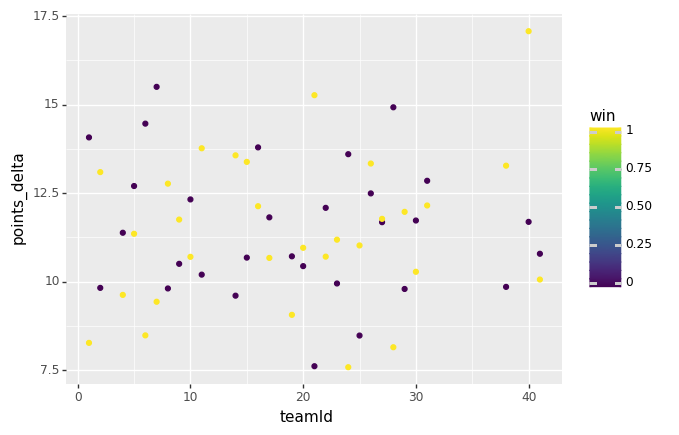

<ggplot: (8742293040521)>

In [87]:
ggplot(grouped_per_win, aes('teamId', 'points_delta', color='win')) + geom_point()